In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from utils import data_loader
from mnist_classifier import NeuralModel, train_model, test_model
from classifier_attacks import test_attack
import matplotlib.pyplot as plt

In [2]:
train_set, test_set = data_loader.get_data()
use_cuda = True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

batch_size = 512
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)


In [3]:
model = NeuralModel()

In [4]:
trained_model = train_model(model, train_loader, epochs =10)

started training ...
the loss after processing this batch is:  2.3163161277770996
the loss after processing this batch is:  2.307192087173462
the loss after processing this batch is:  2.2935101985931396
the loss after processing this batch is:  2.2804784774780273
the loss after processing this batch is:  2.260042667388916
the loss after processing this batch is:  2.246859073638916
the loss after processing this batch is:  2.236339807510376
the loss after processing this batch is:  2.227994680404663
the loss after processing this batch is:  2.2044708728790283
the loss after processing this batch is:  2.2132153511047363
the loss after processing this batch is:  2.1773459911346436
the loss after processing this batch is:  2.1750543117523193
the loss after processing this batch is:  2.1614327430725098
the loss after processing this batch is:  2.1600756645202637
the loss after processing this batch is:  2.1572964191436768
the loss after processing this batch is:  2.139730215072632
the loss 

the loss after processing this batch is:  0.31351518630981445
the loss after processing this batch is:  0.3163456320762634
the loss after processing this batch is:  0.2643176019191742
the loss after processing this batch is:  0.2240217924118042
the loss after processing this batch is:  0.27888691425323486
the loss after processing this batch is:  0.31223297119140625
the loss after processing this batch is:  0.29585030674934387
the loss after processing this batch is:  0.2680083215236664
the loss after processing this batch is:  0.28362932801246643
the loss after processing this batch is:  0.22875140607357025
the loss after processing this batch is:  0.28513893485069275
the loss after processing this batch is:  0.32453131675720215
the loss after processing this batch is:  0.20949001610279083
the loss after processing this batch is:  0.27125978469848633
the loss after processing this batch is:  0.2482580542564392
the loss after processing this batch is:  0.24725674092769623
the loss afte

the loss after processing this batch is:  0.08929542452096939
the loss after processing this batch is:  0.07623797655105591
the loss after processing this batch is:  0.10979674756526947
the loss after processing this batch is:  0.08456350862979889
the loss after processing this batch is:  0.1178426742553711
the loss after processing this batch is:  0.1167689859867096
the loss after processing this batch is:  0.09024665504693985
the loss after processing this batch is:  0.07453826069831848
the loss after processing this batch is:  0.08789513260126114
the loss after processing this batch is:  0.09843319654464722
the loss after processing this batch is:  0.07801026105880737
the loss after processing this batch is:  0.11878515779972076
the loss after processing this batch is:  0.08976205438375473
the loss after processing this batch is:  0.1317966878414154
the loss after processing this batch is:  0.09413440525531769
the loss after processing this batch is:  0.09660347551107407
the loss af

the loss after processing this batch is:  0.09056255221366882
the loss after processing this batch is:  0.09440883994102478
the loss after processing this batch is:  0.05721741169691086
the loss after processing this batch is:  0.10601107031106949
the loss after processing this batch is:  0.06573233753442764
the loss after processing this batch is:  0.07313981652259827
the loss after processing this batch is:  0.09036051481962204
the loss after processing this batch is:  0.04883989319205284
the loss after processing this batch is:  0.08759185671806335
the loss after processing this batch is:  0.10464213043451309
the loss after processing this batch is:  0.06954869627952576
the loss after processing this batch is:  0.09848782420158386
the loss after processing this batch is:  0.07253053784370422
the loss after processing this batch is:  0.07348169386386871
the loss after processing this batch is:  0.03776371479034424
the loss after processing this batch is:  0.09499502927064896
the loss

the loss after processing this batch is:  0.059163108468055725
the loss after processing this batch is:  0.038596220314502716
the loss after processing this batch is:  0.06453420221805573
the loss after processing this batch is:  0.0886959657073021
the loss after processing this batch is:  0.0429813414812088
the loss after processing this batch is:  0.05081593245267868
the loss after processing this batch is:  0.08111503720283508
the loss after processing this batch is:  0.0647336095571518
the loss after processing this batch is:  0.055436402559280396
the loss after processing this batch is:  0.04044084995985031
the loss after processing this batch is:  0.08844926208257675
the loss after processing this batch is:  0.05202508717775345
the loss after processing this batch is:  0.06567619740962982
the loss after processing this batch is:  0.058504022657871246
the loss after processing this batch is:  0.055054642260074615
the loss after processing this batch is:  0.04440117999911308
the lo

the loss after processing this batch is:  0.05138653889298439
the loss after processing this batch is:  0.06667917221784592
the loss after processing this batch is:  0.07207771390676498
the loss after processing this batch is:  0.060126110911369324
the loss after processing this batch is:  0.09664522111415863
the loss after processing this batch is:  0.06226786598563194
the loss after processing this batch is:  0.03373552858829498
the loss after processing this batch is:  0.09279672056436539
the loss after processing this batch is:  0.05392848700284958
the loss after processing this batch is:  0.046477094292640686
the loss after processing this batch is:  0.0781543105840683
the loss after processing this batch is:  0.03476835787296295
the loss after processing this batch is:  0.04002360254526138
the loss after processing this batch is:  0.04634840041399002
the loss after processing this batch is:  0.033297836780548096
the loss after processing this batch is:  0.09261699765920639
the lo

the loss after processing this batch is:  0.03273992985486984
the loss after processing this batch is:  0.039801400154829025
the loss after processing this batch is:  0.053955428302288055
the loss after processing this batch is:  0.03928104043006897
the loss after processing this batch is:  0.04907787963747978
the loss after processing this batch is:  0.0292348712682724
the loss after processing this batch is:  0.03680579364299774
the loss after processing this batch is:  0.022771617397665977
the loss after processing this batch is:  0.016153009608387947
the loss after processing this batch is:  0.009078112430870533
the loss after processing this batch is:  0.058063969016075134
the loss after processing this batch is:  0.1224551722407341
the loss after processing this batch is:  0.04374604672193527
the loss after processing this batch is:  0.043941255658864975
the loss after processing this batch is:  0.052635010331869125
the loss after processing this batch is:  0.04359204322099686
th

the loss after processing this batch is:  0.025965232402086258
the loss after processing this batch is:  0.050259992480278015
the loss after processing this batch is:  0.04807763546705246
the loss after processing this batch is:  0.04496719688177109
the loss after processing this batch is:  0.04262926056981087
the loss after processing this batch is:  0.05821095407009125
the loss after processing this batch is:  0.04296693950891495
the loss after processing this batch is:  0.044285066425800323
the loss after processing this batch is:  0.04372933506965637
the loss after processing this batch is:  0.039135921746492386
the loss after processing this batch is:  0.05874058976769447
the loss after processing this batch is:  0.04552976042032242
the loss after processing this batch is:  0.05863231420516968
the loss after processing this batch is:  0.027377724647521973
the loss after processing this batch is:  0.040154002606868744
the loss after processing this batch is:  0.04101642966270447
th

the loss after processing this batch is:  0.02416801266372204
the loss after processing this batch is:  0.03229618817567825
the loss after processing this batch is:  0.02671089395880699
the loss after processing this batch is:  0.0352741964161396
the loss after processing this batch is:  0.036852993071079254
the loss after processing this batch is:  0.030150115489959717
the loss after processing this batch is:  0.04236980527639389
the loss after processing this batch is:  0.033344071358442307
the loss after processing this batch is:  0.03354900702834129
the loss after processing this batch is:  0.028136737644672394
the loss after processing this batch is:  0.04272013530135155
the loss after processing this batch is:  0.030376240611076355
the loss after processing this batch is:  0.01496786531060934
the loss after processing this batch is:  0.04117938503623009
the loss after processing this batch is:  0.020772583782672882
the loss after processing this batch is:  0.040515750646591187
th

In [5]:
def fgsm(model, X, y, epsilon):
    """ Construct FGSM adversarial examples on the examples X"""
    #delta = torch.zeros_like(X, requires_grad=True)
    #loss = nn.CrossEntropyLoss()(model(X + delta), y)
    X.requires_grad = True
    output = model(X)
    #output = F.log_softmax(output, dim=1)
    loss = F.nll_loss(output, y)

    loss.backward()
    #adv_noise = epsilon * delta.grad.detach().sign()
    adv_noise = epsilon * X.grad.detach().sign()
    return adv_noise

In [6]:
for X,y in test_loader:
    X,y = X.to(device), y.to(device)
    break
    
def plot_images(X,y,yp,M,N):
    f,ax = plt.subplots(M,N, sharex=True, sharey=True, figsize=(N,M*1.3))
    for i in range(M):
        for j in range(N):
            ax[i][j].imshow(1-X[i*N+j][0].detach().cpu().numpy(), cmap="gray")
            title = ax[i][j].set_title("Pred: {}".format(yp[i*N+j].max(dim=0)[1]))
            plt.setp(title, color=('g' if yp[i*N+j].max(dim=0)[1] == y[i*N+j] else 'r'))
            ax[i][j].set_axis_off()
    plt.tight_layout()

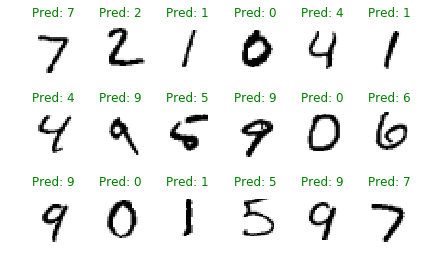

In [7]:
yp = trained_model(X)
plot_images(X, y, yp, 3, 6)

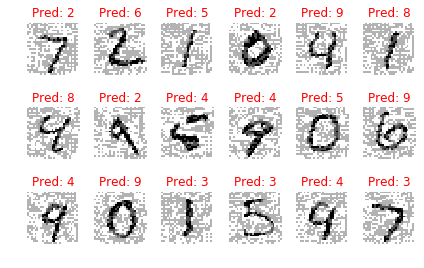

In [8]:
delta = fgsm(trained_model, X, y, 0.3)
perturbed = torch.clamp(X+delta, 0, 1)
yp = trained_model(perturbed)

plot_images(perturbed, y, yp, 3, 6)

In [9]:
def epoch_adversarial(model, loader, attack, *args):
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        delta = attack(model, X, y, *args)
        yp = model(X+delta)
        #yp = F.log_softmax(yp, dim=1)
        #loss = nn.CrossEntropyLoss()(yp,y)
        loss = F.nll_loss(yp, y)
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return 1-(total_err / len(loader.dataset)), total_loss / len(loader.dataset)

In [10]:
print("conv_net:", epoch_adversarial(trained_model, test_loader, fgsm, 0.3)[0])

conv_net: 0.0625


In [11]:
acc , examples =  test_attack(trained_model, device,test_loader, epsilon = 0.3)

Epsilon: 0.3	Test Accuracy = 511 / 10000 = 0.0511


In [15]:
def pgd(model, X, y, epsilon, alpha, num_iter):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        loss = F.nll_loss(model(X + delta), y)
        loss.backward()
        delta.data = (delta + X.shape[0]*alpha*delta.grad.data).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

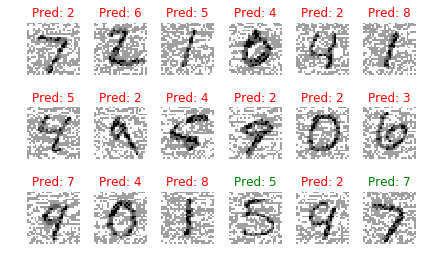

In [16]:
delta = pgd(trained_model, X, y, 0.3, 1e4, 1000)
yp = trained_model(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [22]:
print("conv_net:", epoch_adversarial(trained_model, test_loader, pgd, 0.3, 1e4, 50)[0])

conv_net: 0.08279999999999998


In [23]:
def norms(Z):
    """Compute norms over all but the first dimension"""
    return Z.view(Z.shape[0], -1).norm(dim=1)[:,None,None,None]


def pgd_l2(model, X, y, epsilon, alpha, num_iter):
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        loss = F.nll_loss(model(X + delta), y)
        loss.backward()
        delta.data += alpha*delta.grad.detach() / norms(delta.grad.detach())
        delta.data = torch.min(torch.max(delta.detach(), -X), 1-X) # clip X+delta to [0,1]
        delta.data *= epsilon / norms(delta.detach()).clamp(min=epsilon)
        delta.grad.zero_()
        
    return delta.detach()

CNN: 0.0021999999999999797


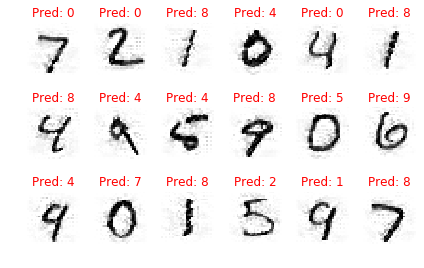

In [26]:
delta = pgd_l2(trained_model, X, y, epsilon=2, alpha=0.3, num_iter=40)
yp = trained_model(X + delta)
plot_images(X+delta, y, yp, 3, 6)
print("CNN:", epoch_adversarial(trained_model, test_loader, pgd_l2, 2, 0.3, 40)[0])

In [27]:
def pgd_linf(model, X, y, epsilon, alpha, num_iter):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        loss = F.nll_loss(model(X + delta), y)
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

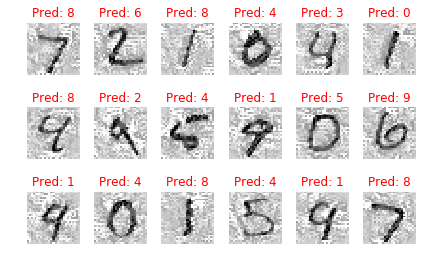

In [30]:
delta = pgd_linf(trained_model, X, y, epsilon=0.3, alpha=1e-2, num_iter=40)
yp = trained_model(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [31]:
print("CNN:", epoch_adversarial(trained_model, test_loader, pgd_linf, 0.3, 1e-2, 40)[0])

CNN: 0.0
